In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

from bokeh.core.properties import value
from bokeh.io import show, output_notebook
from bokeh.plotting import *
from bokeh.models import ColumnDataSource, FactorRange, Legend#, LabelSet
from bokeh.palettes import Spectral6, Spectral8, Category20, Spectral3
from bokeh.transform import factor_cmap

output_notebook()

from sklearn.preprocessing import LabelEncoder

cust = pd.read_csv('custodial-deaths.csv')
shoot = pd.read_csv('officer_shootings.csv')

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [2]:
#Forward fill state abbreviation that were manually added to csv
shoot['state'] = shoot['state'].ffill()

In [3]:
#restrict Shooting df to only Texas departments
shoot = shoot[shoot.state == 'TX']

In [4]:
#add columns of years and months extracted from "Death Date"
cust['year'] = pd.DatetimeIndex(cust['Death Date']).year
cust['month'] = pd.DatetimeIndex(cust['Death Date']).month

In [5]:
#Horizontal bar graph (using Bokeh) of the numbers of occurances of each Manner of Death
mdcounts = cust['Manner Death'].value_counts()
deathtype = list(mdcounts.index)

source = ColumnDataSource(data=dict(deathtype=deathtype, mdcounts=mdcounts))

p = figure(y_range=deathtype, plot_height=500, plot_width=900, title="Manner of Death in Custody from 2005-2016",x_axis_label='Number of Deaths from 2005-2016',
           toolbar_location=None, tools="")

p.hbar(y='deathtype', right='mdcounts', height=0.5, color='color', legend="deathtype", source=source, 
       line_color='white', fill_color=factor_cmap('deathtype', palette=Spectral8, factors=deathtype))

factor_cmap('deathtype', palette=Spectral6, factors=deathtype)

p.xgrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 6000
p.legend.orientation = "vertical"
p.legend.location = "top_right"

show(p)

C:\Users\Lara\Miniconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['Homicide by Other', 'Accidental injury caused by others'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [6]:
mdcounts

Natural Causes/Illness                            5266
Homicide by Law Enforcement/Correctional Staff     884
Suicide                                            844
Alcohol/Drug Intoxication                          284
Other                                              203
Accidental injury to self                          155
Homicide by Other                                   72
Accidental injury caused by others                  21
Name: Manner Death, dtype: int64

In [7]:
homicide = mdcounts['Homicide by Law Enforcement/Correctional Staff']/mdcounts.sum()
print("Percentage of Deaths caused by Homicide by Law Enforcement/Correctional Staff:", homicide, '%')

Percentage of Deaths caused by Homicide by Law Enforcement/Correctional Staff: 0.11437443395 %


In [8]:
#Bar graph showing the Ethnicity of each death in custody
counts = cust['Ethnicity'].value_counts()
eth = list(counts.index)

source = ColumnDataSource(data=dict(eth=eth, counts=counts))

t = figure(y_range=eth, plot_height=500, plot_width=900, title="Ethnicity of Deaths in Custody",x_axis_label='Number of Deaths from 2005-2016',
           toolbar_location=None, tools="")

t.hbar(y='eth', right='counts', height=0.5, color='color', legend="eth", source=source, 
       line_color='white', fill_color=factor_cmap('eth', palette=Spectral8, factors=eth))

factor_cmap('eth', palette=Spectral6, factors=eth)

t.xgrid.grid_line_color = None
t.x_range.start = 0
t.x_range.end = 4000
t.legend.orientation = "vertical"
t.legend.location = "top_right"

show(t)

C:\Users\Lara\Miniconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['Middle East', 'Native Hawaiian/Pacific Islander'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [9]:
#create small df counting deaths grouped by Cause and Ethnicity
breakdown = cust.groupby(['Ethnicity', 'Manner Death'])['Last Name'].count()
death_eth_df = breakdown.unstack()
death_eth_df = death_eth_df.fillna(0).astype(int)

In [10]:
death_eth_df

Manner Death,Accidental injury caused by others,Accidental injury to self,Alcohol/Drug Intoxication,Homicide by Law Enforcement/Correctional Staff,Homicide by Other,Natural Causes/Illness,Other,Suicide
Ethnicity,,,,,,,,
American Indian/Alaska Native,0,0,0,5,0,5,1,2
Anglo or White,3,63,99,321,25,2183,77,455
Asian,0,0,3,5,1,19,0,6
Black or African American,6,36,93,213,22,1687,68,147
Hispanic or Latino,11,54,88,291,24,1363,56,229
Middle East,0,1,0,7,0,2,0,2
Native Hawaiian/Pacific Islander,1,0,1,1,0,1,0,1
Other/Don't Know,0,1,0,35,0,6,1,2


In [11]:
#stacked horizontal bar graph showing deaths by Ethnicity and broken down by Cause of Death
data= {'Ethnicity': list(death_eth_df.index), 'Accidental injury caused by others' : death_eth_df['Accidental injury caused by others'].values, 
       'Natural Causes/Illness': death_eth_df['Natural Causes/Illness'].values,  'Other':death_eth_df['Other'].values, 
       'Accidental injury to self': death_eth_df['Accidental injury to self'].values,  
       'Homicide by Law Enforcement/Correctional Staff': death_eth_df['Homicide by Law Enforcement/Correctional Staff'].values,
       'Suicide': death_eth_df['Suicide'].values, 'Alcohol/Drug Intoxication': death_eth_df['Alcohol/Drug Intoxication'].values, 
       'Homicide by Other': death_eth_df['Homicide by Other'].values}

source = ColumnDataSource(data=data)

g = figure(y_range= data['Ethnicity'], plot_height=500,plot_width=900, title="Manner of Death by Ethnicity",x_axis_label='Number of Deaths from 2005-2016',
           toolbar_location=None, tools="")


g.hbar_stack(deathtype, y= 'Ethnicity', height=0.9, color=Spectral8, source=source,
             legend=[value(x) for x in deathtype])

g.x_range.start = 0
g.x_range.end = 4000
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)


In [12]:
#create smaller df of major cities and their counties in Texas and the Ethnic break down of deaths for each
major = cust[(cust['Department Name'] == 'Texas Department Of Criminal Justice') | (cust['Department Name'] == 'Harris County Sheriff\'s Dept.')| (cust['Department Name'] == 'Houston Police Dept.')| (cust['Department Name'] == 'San Antonio Police Dept.')| (cust['Department Name'] == 'Fort Worth Police Dept.')| (cust['Department Name'] == 'Dallas Police Dept.')| (cust['Department Name'] == 'Dallas County Sheriff\'s Dept.') | (cust['Department Name'] == 'Bexar County Sheriff\'s Dept.')| (cust['Department Name'] == 'Texas Department Of Public Safety')| (cust['Department Name'] == 'Austin Police Dept.')| (cust['Department Name'] == 'Tarrant County Sheriff\s Dept.')| (cust['Department Name'] == 'Travis County Sheriff\'s Dept.')]  
reduce =major.groupby(['Ethnicity', 'Department Name'])['Last Name'].count()
majdept = reduce.unstack()
majdept

Department Name,Austin Police Dept.,Bexar County Sheriff's Dept.,Dallas County Sheriff's Dept.,Dallas Police Dept.,Fort Worth Police Dept.,Harris County Sheriff's Dept.,Houston Police Dept.,San Antonio Police Dept.,Texas Department Of Criminal Justice,Texas Department Of Public Safety,Travis County Sheriff's Dept.
Ethnicity,,,,,,,,,,,
American Indian/Alaska Native,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN
Anglo or White,21.0,19.0,29.0,30.0,29.0,66.0,50.0,27.0,2154.0,51.0,21.0
Asian,1.0,NaN,1.0,NaN,1.0,3.0,3.0,2.0,17.0,NaN,NaN
Black or African American,11.0,15.0,55.0,61.0,16.0,116.0,113.0,25.0,1546.0,9.0,16.0
Hispanic or Latino,6.0,54.0,12.0,27.0,16.0,42.0,65.0,82.0,1347.0,20.0,10.0
Middle East,NaN,NaN,NaN,1.0,NaN,2.0,2.0,1.0,3.0,NaN,NaN
Native Hawaiian/Pacific Islander,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other/Don't Know,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,6.0,NaN,NaN


In [13]:
#Create small df with info for deaths in Houston PD custudy, brokendown by Ethnicity
total= []
for row in majdept['Houston Police Dept.']:
    total.append(row)
hpd = pd.DataFrame()
hpd['ethnicity'] = majdept.index
hpd['value'] = total
hpd = hpd.dropna()

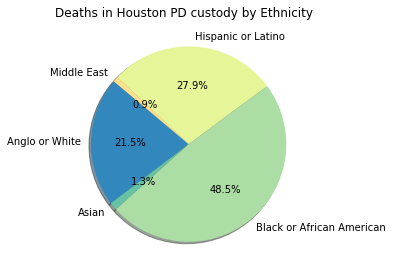

In [14]:
# Pie graph of Ethnicity of Deaths in Houston PD custody
labels = hpd['ethnicity']
sizes = hpd['value']
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Deaths in Houston PD custody by Ethnicity')
plt.rcParams["figure.figsize"] = (10,15)
plt.show()

In [15]:
#Create df for Harris County
total= []
for r in majdept['Harris County Sheriff\'s Dept.']:
    total.append(r)
harris = pd.DataFrame()
harris['ethnicity'] = majdept.index
harris['value'] = total
harris = harris.dropna()

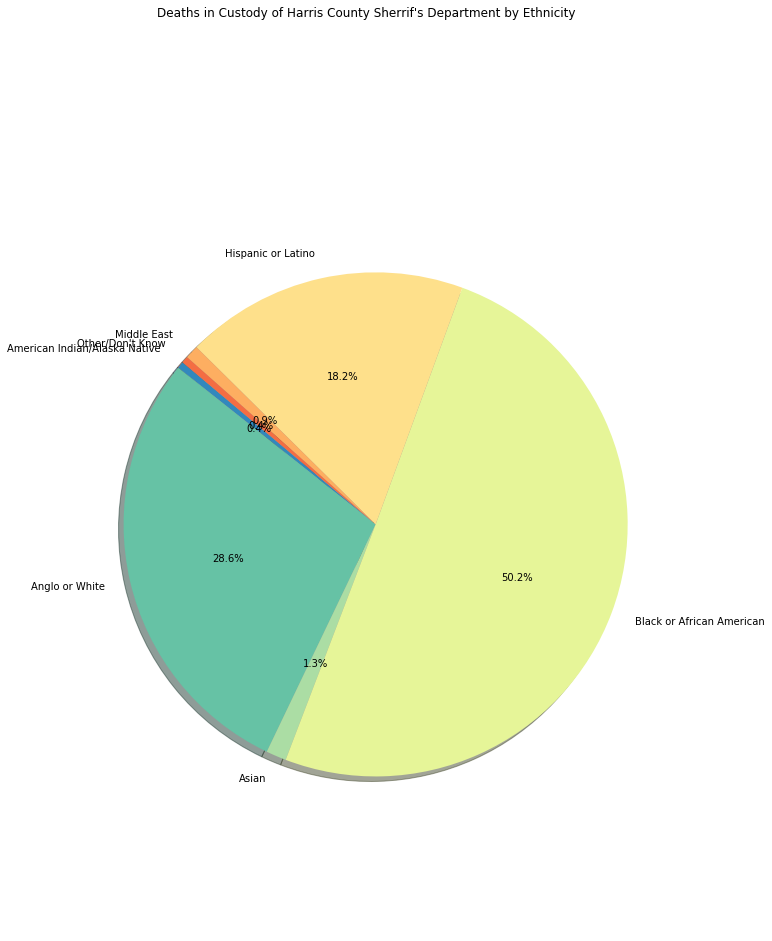

In [16]:
## Pie chart of Harris County Deaths by Ethnicity
labels = harris['ethnicity']
sizes = harris['value']
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Deaths in Custody of Harris County Sherrif\'s Department by Ethnicity')
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

In [17]:
#Create df for San Antonio Police Dept.
total= []
for r in majdept['San Antonio Police Dept.']:
    total.append(r)
sa = pd.DataFrame()
sa['ethnicity'] = majdept.index
sa['value'] = total
sa = sa.dropna()

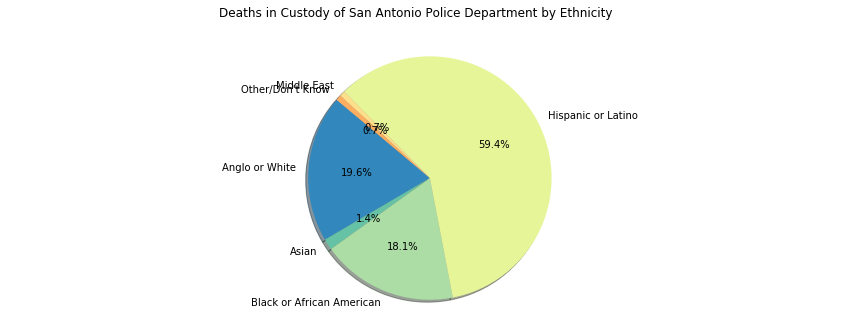

In [18]:
# Pie chart of San Antonio Police Dept. Deaths by Ethnicity
labels = sa['ethnicity']
sizes = sa['value']
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Deaths in Custody of San Antonio Police Department by Ethnicity')
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

In [19]:
#Create df for Bexar County
total= []
for r in majdept['Bexar County Sheriff\'s Dept.']:
    total.append(r)
bexar = pd.DataFrame()
bexar['ethnicity'] = majdept.index
bexar['value'] = total
bexar = bexar.dropna()

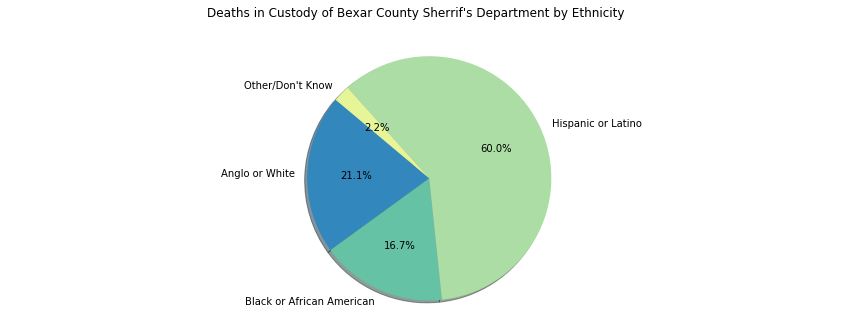

In [20]:
#Pie chart of Bexar County Deaths by Ethnicity
labels = bexar['ethnicity']
sizes = bexar['value']
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Deaths in Custody of Bexar County Sherrif\'s Department by Ethnicity')
plt.rcParams["figure.figsize"] = (10,4)
plt.show()

In [21]:
#create small df of deaths grouped by year and counts for each Manner of Death
line = cust.groupby('year')['Manner Death'].value_counts()
line =line.unstack().fillna(0).astype(int)
line

Manner Death,Accidental injury caused by others,Accidental injury to self,Alcohol/Drug Intoxication,Homicide by Law Enforcement/Correctional Staff,Homicide by Other,Natural Causes/Illness,Other,Suicide
year,,,,,,,,
2005,1,12,25,41,3,382,6,76
2006,0,10,36,46,11,483,4,67
2007,6,14,43,65,2,465,3,72
2008,4,15,24,66,6,498,11,58
2009,2,10,18,74,2,446,6,64
2010,0,14,15,65,7,399,12,76
2011,2,21,24,57,9,426,12,62
2012,1,17,22,97,13,449,15,76
2013,0,13,27,91,6,479,13,64


In [22]:
#line graph showing number of death in each year for each type of Manner of Death

x= list(line.index)

l = figure(title="Manner of Death by year", y_range=(0, 500), y_axis_label='Number of Deaths',x_axis_label='Year', plot_width=1000)

r0= l.line(x, line['Accidental injury caused by others'], line_color="tomato", line_dash="dotdash")

r1= l.line(x, line['Accidental injury to self'])
r2= l.circle(x, line['Accidental injury to self'])

r3= l.line(x, line['Alcohol/Drug Intoxication'],line_width=2, line_color="olivedrab") 

r4= l.line(x, line['Homicide by Law Enforcement/Correctional Staff'], line_dash="dotted", line_color="gold") 

r5= l.line(x, line['Homicide by Other'], line_dash="dashed", line_width=2, line_color="indigo") 

r6 = l.line(x, line['Natural Causes/Illness'], line_color="coral") 
r7 = l.square(x, line['Natural Causes/Illness'], fill_color=None, line_color="coral")

r8 = l.line(x, line['Other'], line_color="green") 
r9 = l.triangle(x, line['Other'], line_color= "green")

r10 = l.line(x, line['Suicide'], line_color="orange") 
r11 = l.cross(x, line['Suicide'], line_color = "orange")

legend = Legend(items=[
    ("Accidental injury caused by others", [r0]), 
    ("Accidental injury to self", [r1, r2]), 
    ("Alcohol/Drug Intoxication", [r3]), 
    ("Homicide by Law Enforcement/Correctional Staff", [r4]), 
    ("Homicide by Other", [r5]),("Natural Causes/Illness", [r6, r7]), 
    ("Other", [r8, r9]),
    ("Suicide", [r10, r11]),
], location=(0, -30))

l.add_layout(legend, 'right')

show(l)

In [23]:
#create df of Officer Involved Shootings (in Texas), broken down by Department and Race of Subject
race = shoot.groupby('Department')['SubjectRace'].value_counts().unstack('Department')

In [24]:
#relabel single letter race labels with full name of race
race.rename({'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'}, inplace=True)
race

Department,Austin PD,Dallas Police Department,El Paso PD,El Paso Police Department,Fort Worth PD,Houston Police Department,San Antonio PD,San Antonio Police Department,San Antonio Police Dept
SubjectRace,,,,,,,,,
Asian,1.0,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Black,11.0,58.0,NaN,1.0,15.0,163.0,14.0,1.0,1.0
Latino,8.0,38.0,3.0,1.0,6.0,81.0,26.0,10.0,NaN
Unknown,NaN,NaN,1.0,NaN,2.0,30.0,14.0,NaN,NaN
White,26.0,22.0,14.0,1.0,23.0,34.0,24.0,NaN,2.0


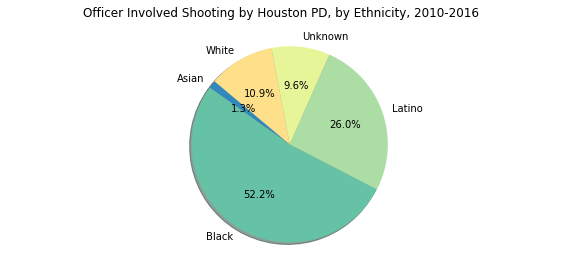

In [25]:
# Pie chart of Houston PD  Shootings by Ethnicity
labels = race.index
sizes = race['Houston Police Department']
 
# Plot
plt.pie(sizes, explode= None, labels=labels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.suptitle('Officer Involved Shooting by Houston PD, by Ethnicity, 2010-2016')
plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [26]:
#divide "shoot" df based on fatality
fatal = shoot[shoot.Fatal == 'F']
non = shoot[shoot.Fatal == 'N']

In [27]:
#Breakdown fatal shootings by ethnicity
frace= fatal.SubjectRace.value_counts()

#change race labels from single letter to full name
frace.rename({'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'}, inplace=True)

In [28]:
#breakdown non-fatal shootings by ethnicity
nrace= non.SubjectRace.value_counts()

#change race labels from single letter to full name
nrace.rename({'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'}, inplace=True)

Text(0.5,1,'Non-fatal Shootings by Ethnicity')

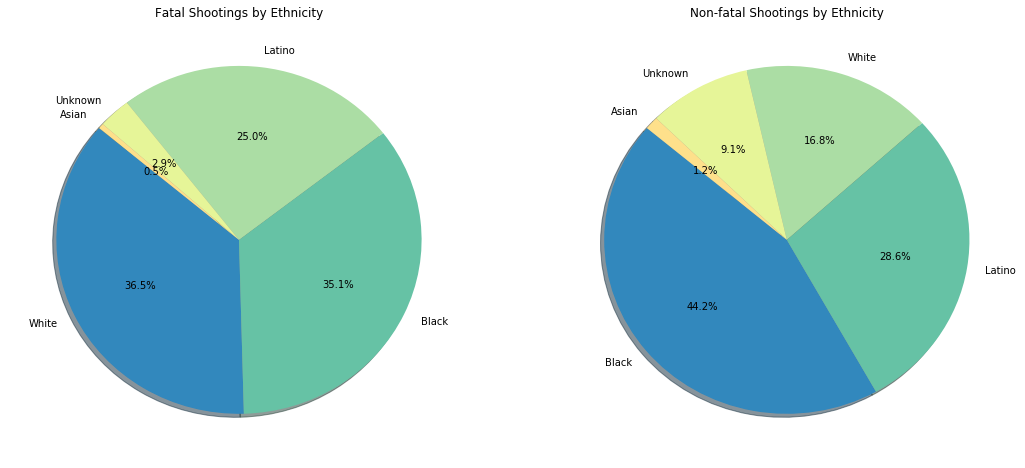

In [29]:
# pie charts showing racial breakdown of fatal vs non-fatal shootings
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (18,8))

flabels = frace.index
fsizes = frace
nlabels = nrace.index
nsizes = nrace

ax1.pie(fsizes, explode= None, labels=flabels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')
ax1.set_title('Fatal Shootings by Ethnicity')
#plt.rcParams["figure.figsize"] = (20,20)

ax2.pie(nsizes, explode= None, labels=nlabels, colors=Spectral8,
        autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')
ax2.set_title('Non-fatal Shootings by Ethnicity')
#plt.rcParams["figure.figsize"] = (20,20)


In [30]:
#create df of shooting broken down by whether the subjects was armed and whether fatal
armfat = shoot.groupby('SubjectArmed')['Fatal'].value_counts().unstack()

#change labels from single letter to full word
armfat.rename({'N': 'Not Armed', 'U':'Unknown', 'Y':'Armed'}, inplace=True)
armfat.rename(columns ={'F': 'Fatal', 'U':'Unknown', 'N':'Not Fatal'}, inplace=True)

In [31]:
armfat

Fatal,Fatal,Not Fatal,Unknown
SubjectArmed,,,
Not Armed,83,218,3
Unknown,2,9,2
Armed,123,193,7


In [32]:
#stacked horizontal bar graph showing Officer involved shootings Fatality vs Subject Armed
fatality = armfat.columns
data= {'Subject Armed': list(armfat.index), 'Fatal' : armfat['Fatal'].values, 
       'Not Fatal': armfat['Not Fatal'].values,  'Unknown':armfat['Unknown'].values}

source = ColumnDataSource(data=data)

s = figure(y_range= data['Subject Armed'], plot_height=300,plot_width=900, title="Officer Involved Shootings by Fatality and Armed Subject",x_axis_label='Number of Incidents',
           toolbar_location=None, tools="")


s.hbar_stack(fatality, y= 'Subject Armed', height=0.5, color=Spectral3, source=source,
             legend=[value(x) for x in fatality])

s.x_range.start = 0
s.x_range.end = 500
s.y_range.range_padding = 0.1
s.xgrid.grid_line_color = None
s.axis.minor_tick_line_color = None
s.outline_line_color = None
s.legend.location = "top_right"
s.legend.orientation = "vertical"

show(s)


In [33]:
#create of shooting where Subjects were Unarmed
unarmed = shoot[shoot.SubjectArmed == 'N']

#relabel race values as full word, rather than abreviation
racedict ={'A': 'Asian', 'B':'Black', 'L':'Latino', 'U':'Unknown', 'W':'White'} 
unarmed = unarmed.replace({"SubjectRace": racedict})

In [34]:
#create of shooting where Subjects were Armed
armed = shoot[shoot.SubjectArmed == 'Y']

#relabel race values as full word, rather than abreviation
armed = armed.replace({"SubjectRace": racedict})

In [35]:
unarmed = unarmed.rename(columns={'Fatal':'Fatality'})

#breakdown Unarmed shootings by Race and Fatality
unarmrace= unarmed.groupby('SubjectRace').Fatality.value_counts().unstack().fillna(0).astype(int)
unarmrace = unarmrace.rename(columns = {'F':'Fatal', 'N':'Not Fatal', 'U':'Unknown'})
unarmrace

Fatality,Fatal,Not Fatal,Unknown
SubjectRace,,,
Black,31,88,2
Latino,18,61,0
Unknown,3,29,1
White,31,37,0


In [36]:
#stacked horizontal bar graph of Unarmed shootings brokendown by Race and Fatality
y = unarmrace.columns
data= {'Race': list(unarmrace.index), 'Fatal' : unarmrace['Fatal'].values, 
       'Not Fatal': unarmrace['Not Fatal'].values, 'Unknown': unarmrace['Unknown'].values}
       
source = ColumnDataSource(data=data)

c = figure(x_range= data['Race'], plot_width=400,plot_height=600, title="Race and Fatality of Unarmed Subjects", y_axis_label='Number of Incidents',
           toolbar_location=None, tools="")

c.vbar_stack(y, x= 'Race', width=0.5, color=Spectral3, source=source,
             legend=[value(x) for x in y])

c.y_range.start = 0
c.y_range.end = 150
c.x_range.range_padding = 0.1
c.xgrid.grid_line_color = None
c.axis.minor_tick_line_color = None
c.outline_line_color = None
c.legend.location = "top_right"
c.legend.orientation = "vertical"

show(c)

In [37]:
armed = armed.rename(columns={'Fatal':'Fatality'})

#create df of Armed shooting subjects, brokendown by Race and Fatality
racefatal= armed.groupby('SubjectRace').Fatality.value_counts().unstack().fillna(0).astype(int)
racefatal = racefatal.rename(columns = {'F':'Fatal', 'N':'Not Fatal', 'U':'Unknown'})
racefatal

Fatality,Fatal,Not Fatal,Unknown
SubjectRace,,,
Asian,1,5,0
Black,41,92,5
Latino,33,54,1
Unknown,3,9,1
White,45,32,0


In [38]:
#stacked horizontal bar graph of Armed shooting subjects, brokendown by Race and Fatality
y = racefatal.columns
data= {'Race': list(racefatal.index), 'Fatal' : racefatal['Fatal'].values, 
       'Not Fatal': racefatal['Not Fatal'].values, 'Unknown': racefatal['Unknown'].values}
       
source = ColumnDataSource(data=data)

b = figure(x_range= data['Race'], plot_height=600,plot_width=400, title="Race and Fatality of Armed Subjects", y_axis_label='Number of Incidents',
           toolbar_location=None, tools="")

b.vbar_stack(y, x= 'Race', width=0.5, color=Spectral3, source=source,
             legend=[value(x) for x in y])

b.y_range.start = 0
b.y_range.end = 150
b.x_range.range_padding = 0.1
b.xgrid.grid_line_color = None
b.axis.minor_tick_line_color = None
b.outline_line_color = None
b.legend.location = "top_right"
b.legend.orientation = "vertical"

show(b)

In [39]:
#combine above bar graphs into one

from bokeh.layouts import gridplot
from bokeh.palettes import Viridis3

# make a grid
grid = gridplot([b, c], ncols=2, plot_width=300, plot_height=400)

# show the results
show(grid)

## More white people were killed in both armed and unarmed shootings, despite the fact that Black and Latino people were involved in more total shootings

## It's unclear why this is, but it is possible that white subjects were more likely to be engaging in more violent/serious crimes

In [40]:
shoot.SubjectRace.value_counts()

B    264
L    173
W    146
U     47
A      6
Name: SubjectRace, dtype: int64

In [41]:
#Houston PD had no entried for "NatureOfStop" so it is removed from exploration on the Nature of the Stops
armed[armed.city != 'Houston'].NatureOfStop.isnull().value_counts()

False    167
True       1
Name: NatureOfStop, dtype: int64

In [42]:
#create df without Houston PD, of Armed shootings broken down by Race and Fatality
nohou = armed[armed.city != 'Houston']
nohou = nohou.groupby('SubjectRace').Fatality.value_counts().unstack().fillna(0).astype(int)
nohou = nohou.rename(columns = {'F':'Fatal', 'N':'Not Fatal'})
nohou

Fatality,Fatal,Not Fatal
SubjectRace,,
Asian,1,1
Black,19,29
Latino,21,26
Unknown,2,3
White,39,26


In [43]:
#stacked horizontal bar graph of Armed shootings, exclusing Houston PD, broken down by Race and Fatality
col = nohou.columns
data= {'Race': list(nohou.index), 'Fatal' : nohou['Fatal'].values, 'Not Fatal': nohou['Not Fatal'].values}
       
source = ColumnDataSource(data=data)

h = figure(y_range= data['Race'], plot_height=300,plot_width=900, title="Race and Fatality of Armed Subjects (Austin, San Antonio, Dallas)", x_axis_label='Number of Incidents',
           toolbar_location=None, tools="")

h.hbar_stack(col, y= 'Race', height=0.5, color=['red','blue'], source=source,
             legend=[value(x) for x in col])

h.x_range.start = 0
h.x_range.end = 200
h.y_range.range_padding = 0.1
h.xgrid.grid_line_color = None
h.axis.minor_tick_line_color = None
h.outline_line_color = None
h.legend.location = "top_right"
h.legend.orientation = "vertical"

show(h)

## When Houston is excluded, White subjects become the majority, so it makes sense that White Subjects would have the highest total of fatalities (though it does still appear that  high % of White subjects were killed than other races). Since there is no data on "Nature of Sto" for Houston PD, it cannot be examined in relation to Race/Fatality.

In [44]:
unarmed[unarmed.city != "Houston"].NatureOfStop.isnull().value_counts()

False    152
Name: NatureOfStop, dtype: int64

In [45]:
#create df without Houston PD, of Unarmed shootings broken down by Race and Fatality
noarmnat = unarmed[unarmed.city != 'Houston']
noarmnat = noarmnat.groupby('SubjectRace').Fatality.value_counts().unstack().fillna(0).astype(int)
noarmnat = noarmnat.rename(columns = {'F':'Fatal', 'N':'Not Fatal'})
noarmnat

Fatality,Fatal,Not Fatal
SubjectRace,,
Black,19,32
Latino,14,27
Unknown,0,12
White,26,20


In [46]:
#stacked horizontal bar graph of Unarmed shootings, exclusing Houston PD, broken down by Race and Fatality
col = noarmnat.columns
data= {'Race': list(noarmnat.index), 'Fatal' : noarmnat['Fatal'].values, 'Not Fatal': noarmnat['Not Fatal'].values}
       
source = ColumnDataSource(data=data)

k = figure(y_range= data['Race'], plot_height=300,plot_width=900, title="Race and Fatality of Armed Subjects (Austin, San Antonio, Dallas)", x_axis_label='Number of Incidents',
           toolbar_location=None, tools="")

k.hbar_stack(col, y= 'Race', height=0.5, color=['red','blue'], source=source,
             legend=[value(x) for x in col])

k.x_range.start = 0
k.x_range.end = 200
k.y_range.range_padding = 0.1
k.xgrid.grid_line_color = None
k.axis.minor_tick_line_color = None
k.outline_line_color = None
k.legend.location = "top_right"
k.legend.orientation = "vertical"

show(k)

## The same effect of more white subjects killed, despite a higher number of Black subjects, is still found even when excluding Houston PD, but the effect is less weaker

In [47]:
#create new column in Armed df, coding all "NatureOfStop" values as "violent", "non-violent" or "unknown"
# "violence" label was determined by author's jugdgment and based on terms like "aggrevated" and "shooting"
armed['violence'] = armed['NatureOfStop'].map({'Domestic Disturbance': 'u', 'Burglary / home invasion': 'u',
       'Shots fired / shooting': 'v', 'Robbery':'u',
       'Mental crisis / suicide attempt':'u', 'Weapons disturbance':'v', 'Other':'u',
       'Suspicious activity / patrol':'n', 'Suspicious person':'n',
       'Warrant Service':'n', 'Suspicious Person':'n', 'Disturbance; firearm':'v',
       'Assault; weapons posession; firearms':'v', 'Aggravated robbery':'v',
       'Active shooter':'v', 'Aggravated kidnapping':'v', 'Shots fired':'v',
       'Felony fugitive':'u', 'Narcotics':'n', 'Traffic stop':'n',
       'Suspicious behavior':'n', 'aggravated robbery':'v',
       'Weapons posession; suicide':'v', 'Disturbance':'n',
       'Narcotics; undercover operation':'n', 'Suicide':'u',
       'Weapons posession; firearms':'v', 'Drugs':'n', 'Crowd-control; shooting':'v',
       "Drugs; expired driver's license plate":'n',
       'Prostitution; police shooting':'v', 'Drunkeness; weapons posession':'v',
       'Shooting':'v', 'Murder':'v', 'Robbery; suspicious behavior':'u',
       'Aggraveted assault':'v', 'Weapons posession':'v', 'Major disturbance':'u',
       'Complaint; drugs':'n', 'Armed encounter':'v', 'Stolen car':'u',
       'Domestic disturbance':'n', 'shooting; police shooting':'v', 'shooting':'v',
       'Robbery; police shooting':'v', 'Sex crime':'n', 'hit-and-run':'n',
       'Suicide; weapons posession':'v', 'Robbery of officer':'u',
       'Vehicle pursuit':'n', nan:'u', 'Property crime':'n',
       'Drug suspicion / drug warrant':'n', 'Fight / disorderly conduct':'u',
       'Execuition of a warrant "suspect pulled out a firearm" https://www.nbcdfw.com/news/local/Shooting-Involving-US-Marshals-in-Fort-Worth-Police-368676191.html': 'v',
       'Emergencey call, traffic stop, execuition of warrant':'n',
       'Hostage, barrcade of other emergencey situation. "appeared to be a rifle" http://www.star-telegram.com/news/local/community/fort-worth/article72475392.html':'v',
       'Execution of a warrant':'n',
       'Emergencey call or request for assitance':'n', 'Assault':'v', 'Unknown':'u',
       'Suspicious activity/Patrol as requested by homeowner':'n',
       'Emergency Call or Request for Assistance':'n',
       'Stolen Vehicle/Aggravated Robbery Apprehension':'v',
       'Suicide in progress':'u', 'Family Disturbance':'n'})

In [48]:
#remove Houston PD from the df and count occurances by Race and new "violence" column
cause =armed[armed.city != 'Houston']
cause = cause.groupby('SubjectRace').violence.value_counts().unstack()
cause

violence,n,u,v
SubjectRace,,,
Asian,1.0,NaN,1.0
Black,12.0,15.0,21.0
Latino,18.0,14.0,15.0
Unknown,1.0,3.0,1.0
White,17.0,26.0,22.0


## The distribution of violent vs not appears to be fairly equal between races, however this analysis may be flawed since the instances were categorize based on "Nature of Stop" alone, and not based on a full narrative.

# Preparing data for modeling

In [91]:
# Convert the categorical inputs of somefeatures/columns in "cust" df to numerical nature
newcust = pd.DataFrame()

numeric = LabelEncoder()
newcust['dept']=numeric.fit_transform(cust['Department Name'].astype('str'))
newcust['custody_type']=numeric.fit_transform(cust['Custody Type'].astype('str'))
newcust['facility']=numeric.fit_transform(cust['Custody Type Facility'].astype('str'))
newcust['race']=numeric.fit_transform(cust['Ethnicity'].astype('str'))
newcust['sex']=numeric.fit_transform(cust['Sex'].astype('str'))
newcust['death_type']=numeric.fit_transform(cust['Manner Death'].astype('str'))
newcust['charge_status']=numeric.fit_transform(cust['Charges Status'].astype('str'))

#copy numeric columns from "cust" to "newcust"
newcust['age']=cust['Age']
newcust['year']=cust['year']
newcust['month']=cust['month']

In [88]:
newcust.head()

,dept,custody_type,facility,race,sex,death_type,charge_status,age,year,month
0,389,2,134,4,1,5,0,58.0,2012,9
1,389,2,115,3,1,5,0,76.0,2016,9
2,175,1,0,4,1,6,2,30.0,2016,12
3,389,2,60,1,1,1,0,39.0,2011,11
4,389,2,77,1,1,5,0,31.0,2014,12


In [51]:
newcust.isna().any()

dept             False
custody_type     False
facility         False
race             False
sex              False
death_type       False
charge_status    False
age               True
year             False
month            False
dtype: bool

In [89]:
#fill NaN values in "age" column with mean of existing values in age column
newcust['age'] = newcust.age.fillna(newcust.age.mean())

In [90]:
#check normalcy of the variables
import scipy
scipy.stats.normaltest(newcust)

NormaltestResult(statistic=array([ 1792.38045006,  1122.88841694,  2350.91061539,  2108.89964148,
        6078.30552903,   935.79731322,  2010.91184425,   147.79958534,
        9321.4755425 ,  7475.51772874]), pvalue=array([  0.00000000e+000,   1.47190020e-244,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   6.22580257e-204,
         0.00000000e+000,   8.04873873e-033,   0.00000000e+000,
         0.00000000e+000]))

The p-values for this test are all 0, or essentially 0, meaning none of the variables are normally distributed, so non-parametric tests should be used (Spearman's R)

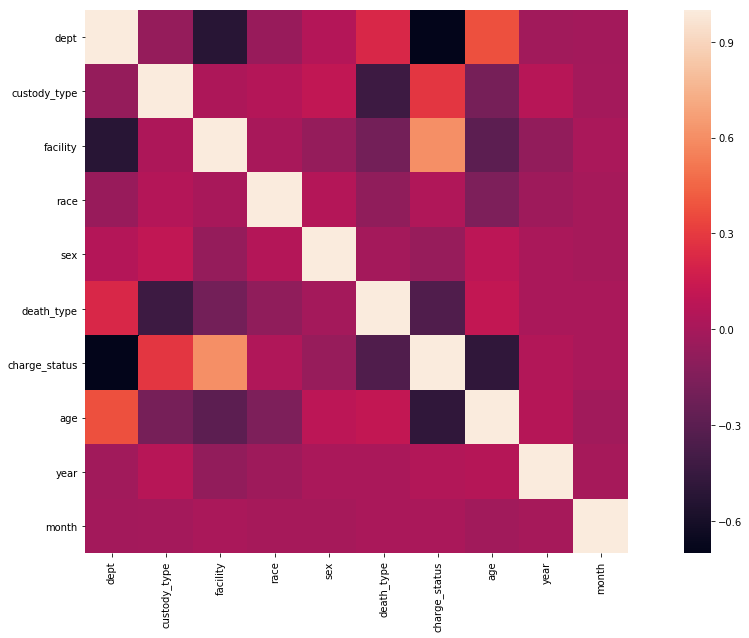

In [96]:
#visualized 'heatmap' of correlations between the variables in the "newcust" df
corrmat= newcust.corr(method = 'spearman')
sns.heatmap(corrmat, square=True)

In [97]:
# Convert the categorical inputs of data features/columns in "shoot" df to numerical nature
newshoot = pd.DataFrame()

#copy numeric columns from "cust" to "newcust"
newshoot['age']= shoot['SubjectAge']
newshoot['number_officers']= shoot['NumberOfOfficers']

numeric = LabelEncoder()
newshoot['fatality']=numeric.fit_transform(shoot['Fatal'].astype('str'))
newshoot['armed']=numeric.fit_transform(shoot['SubjectArmed'].astype('str'))
newshoot['race']=numeric.fit_transform(shoot['SubjectRace'].astype('str'))
newshoot['sex']=numeric.fit_transform(shoot['SubjectGender'].astype('str'))
newshoot['stop_reason']=numeric.fit_transform(shoot['NatureOfStop'].astype('str'))
newshoot['officer_race']=numeric.fit_transform(shoot['OfficerRace'].astype('str'))
newshoot['dept']= numeric.fit_transform(shoot['Department'].astype('str'))

#create year and month columns pulled from the date column in the original df
newshoot['year'] = pd.DatetimeIndex(shoot['Date']).year
newshoot['month'] = pd.DatetimeIndex(shoot['Date']).month

In [103]:
newshoot.head()

,age,number_officers,fatality,armed,race,sex,stop_reason,officer_race,dept,year,month
103,26.0,1.0,0,2,4,1,23,13,0,2010,9
104,16.0,1.0,0,2,2,1,13,40,0,2010,10
105,26.0,2.0,0,2,0,1,66,48,0,2010,11
106,35.0,1.0,0,0,4,1,86,5,0,2010,12
107,30.0,1.0,0,2,2,1,66,13,0,2011,5


In [56]:
newshoot.count()

age                475
number_officers    626
fatality           640
armed              640
race               640
sex                640
stop_reason        640
officer_race       640
dept               640
year               640
month              640
dtype: int64

In [57]:
#checking for non-numeric values
newshoot.number_officers.value_counts()

1            460
2            106
3             34
4              9
6              7
5              5
2 or More      2
9              1
12             1
16             1
Name: number_officers, dtype: int64

In [58]:
#check for non-numeric values
newshoot.age.value_counts()

26          27
U           26
32          22
21          21
22          21
29          20
34          20
23          18
24          17
35          16
30          15
20          15
37          14
31          14
33          14
28          13
19          13
25          13
18          12
47          11
46          10
27           9
17           8
41           7
38           7
40           7
36           6
42           6
39           6
53           6
44           5
54           5
45           4
55           4
51           4
49           3
50           3
43           3
48           3
60           3
57           3
52           3
63           2
70           2
Juvenile     2
69           2
15           2
56           2
16           1
61           1
62           1
58           1
59           1
72           1
Name: age, dtype: int64

In [98]:
#replace instances of '2 or More' with "2"
newshoot.loc[newshoot['number_officers'] == '2 or More', 'number_officers'] = '2'

#replace instances of "U" with NaN
newshoot.loc[newshoot['age'] == 'U', 'age'] = np.nan

#replace instances of "Juvenile" with "15"
newshoot.loc[newshoot['age'] == 'Juvenile', 'age'] = '15' 

In [99]:
#change all column types to numeric
newshoot = newshoot.apply(pd.to_numeric, errors='coerce')

In [100]:
#fill NaN values in Age column with mean of existing values in Age column
newshoot['age'] = newshoot.age.fillna(newshoot.age.mean())

In [101]:
#fill NaN values in Number of Officers column with integer version of mean of existing values in column
newshoot['number_officers'] = newshoot.number_officers.fillna(int(newshoot.number_officers.mean()))

In [105]:
#check normalcy of the variables
scipy.stats.normaltest(newshoot)

NormaltestResult(statistic=array([  1.26580240e+02,   7.70129530e+02,   7.29407544e+01,
         3.84227853e-01,   2.45805020e+02,   1.00343437e+02,
         8.16392564e+01,   1.18852428e+01,   1.22530099e+02,
         3.01887741e+02,   6.54826235e+02]), pvalue=array([  3.26174573e-028,   5.86809934e-168,   1.44916028e-016,
         8.25212849e-001,   4.20841120e-054,   1.62442421e-022,
         1.87180547e-018,   2.62513902e-003,   2.47130873e-027,
         2.79196520e-066,   6.40161710e-143]))

The p-values for this test are all 0, or essentially 0, meaning none of the variables are normally distributed, so non-parametric tests should be used (Spearman's R)

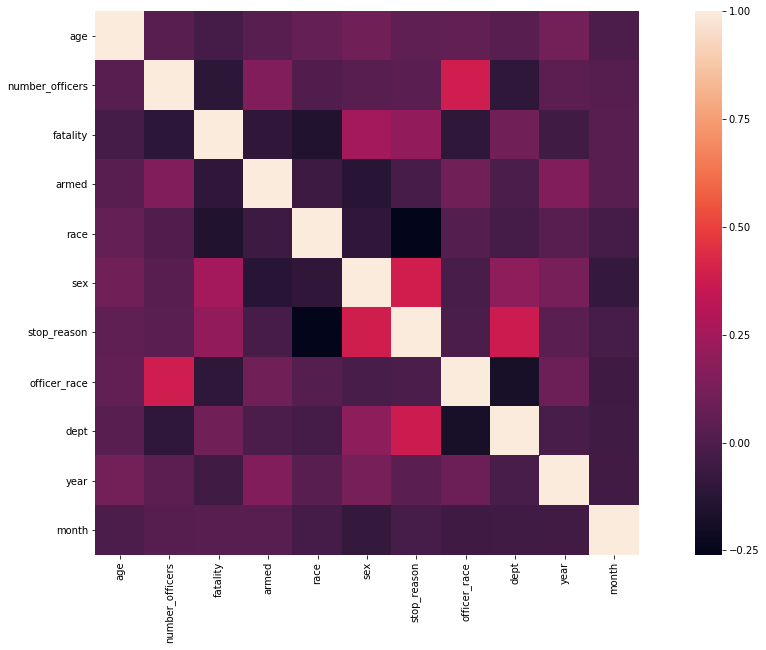

In [106]:
#visualized 'heatmap' of correlations between the variables in the "newshoot" df
corrmat= newshoot.corr(method='spearman')
sns.heatmap(corrmat, square=True)

## Feature reduction/engineering

In [64]:
newcust.head()

,dept,custody_type,facility,race,sex,death_type,charge_status,age,year,month
0,389,2,134,4,1,5,0,58.0,2012,9
1,389,2,115,3,1,5,0,76.0,2016,9
2,175,1,0,4,1,6,2,30.0,2016,12
3,389,2,60,1,1,1,0,39.0,2011,11
4,389,2,77,1,1,5,0,31.0,2014,12


In [65]:
#"facility" does not appear to be a valuable feature of interest
newcust.drop('facility', axis=1, inplace=True)

In [66]:
#"charge_status" does not appear to be a valuable feature of interest
newcust.drop('charge_status', axis=1, inplace=True)

In [67]:
#"year" does not appear to be a valuable feature of interest
newcust.drop('year', axis=1, inplace=True)

In [68]:
#"month" does not appear to be a valuable feature of interest
newcust.drop('month', axis=1, inplace=True)

In [69]:
#"dept" is an "id" variable that may invalidate results
newcust.drop('dept', axis=1, inplace=True)

In [70]:
newcust.sex.value_counts()

1    7313
0     416
Name: sex, dtype: int64

In [71]:
# because there is very little variance in the "sex" feature it is dropped
newcust.drop('sex', axis=1, inplace=True)

In [72]:
newcust.head()

,custody_type,race,death_type,age
0,2,4,5,58.0
1,2,3,5,76.0
2,1,4,6,30.0
3,2,1,1,39.0
4,2,1,5,31.0


In [73]:
newshoot.head()

,age,number_officers,fatality,armed,race,sex,stop_reason,officer_race,dept,year,month
103,26.0,1.0,0,2,4,1,23,13,0,2010,9
104,16.0,1.0,0,2,2,1,13,40,0,2010,10
105,26.0,2.0,0,2,0,1,66,48,0,2010,11
106,35.0,1.0,0,0,4,1,86,5,0,2010,12
107,30.0,1.0,0,2,2,1,66,13,0,2011,5


In [74]:
# make new column indicating where there was more than one officer involved in the incident
newshoot['mult_officers'] = np.where(newshoot.number_officers> 1, 1, 0)

In [75]:
# drop "number of officers" column as it is now redundant
newshoot.drop('number_officers', axis=1, inplace=True)

In [76]:
# drop "Nature of Stop/Reason" column because there are so many different values/inconsisent
newshoot.drop('stop_reason', axis=1, inplace=True)

In [77]:
newshoot.sex.value_counts()
# "3" are NaN values, "2" are "unknown" and "0" are female

1    465
3    147
2     17
0     11
Name: sex, dtype: int64

In [78]:
# because there is very little variance in the "sex" feature it is dropped
newshoot.drop('sex', axis=1, inplace=True)

In [79]:
shoot.OfficerRace.value_counts()

W                                  219
L                                   99
B                                   79
H                                   55
W;W                                 27
A                                   16
W;L                                  9
L;W                                  7
U                                    6
W;W;W;W;W;W                          6
L;L                                  6
W;H                                  5
W;U                                  5
W,W                                  5
H; H                                 4
L;W;W                                4
W;W;L                                4
B;B                                  4
B;W                                  3
L;A                                  3
W;W;W                                3
H;W                                  3
W;B                                  3
H; W                                 2
A;L;B                                2
W; H                     

In [80]:
# drop "Officer Race" column because there are so many different values/inconsisent
newshoot.drop('officer_race', axis=1, inplace=True)

In [81]:
#"year" does not appear to be a valuable feature of interest
newshoot.drop('year', axis=1, inplace=True)

In [82]:
#"month" does not appear to be a valuable feature of interest
newshoot.drop('month', axis=1, inplace=True)

In [83]:
#"dept" is an "id" variable that may invalidate results
newshoot.drop('dept', axis=1, inplace=True)

In [84]:
newshoot.head()

,age,fatality,armed,race,mult_officers
103,26.0,0,2,4,0
104,16.0,0,2,2,0
105,26.0,0,2,0,1
106,35.0,0,0,4,0
107,30.0,0,2,2,0


In [85]:
#convert to csv for future use
newcust.to_csv('custody_ML.csv')
newshoot.to_csv('shootings_ML.csv')

In [86]:
#save cleaned dfs
cust.to_csv('clean_custody.csv')
shoot.to_csv('clean_shootings.csv')